In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(reticulate)

In [3]:
pbmc.data <- Read10X(
    'filtered_gene_bc_matrices/hg19/'
)

as(<dgTMatrix>, "dgCMatrix") is deprecated since Matrix 1.5-0; do as(., "CsparseMatrix") instead



In [4]:
pbmc <- CreateSeuratObject(counts = pbmc.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
pbmc <- NormalizeData(pbmc)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 16104 rows containing missing values (geom_point).”


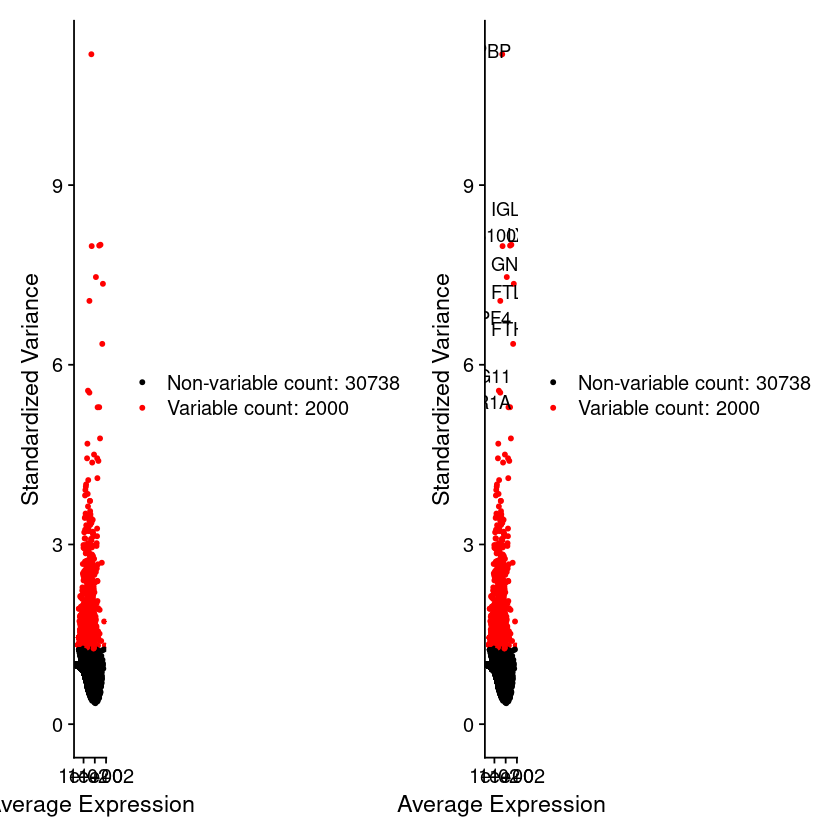

In [6]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

In [7]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [8]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc), npcs = 500)

PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, GIMAP7 
	   BEX2, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, NKG7, KLRG1, SAMD3 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
PC_ 3 
Positive:  PPBP, PF4, SDPR, SPARC, GNG11, NRGN, GP

In [27]:
write.csv(pbmc@reductions$pca[[]], file = 'pca_matrix.csv')

This is the first point where difference could appear. Calculate distance matrix based on the Scaled Genes.

In [10]:
scaled.data <- GetAssayData(pbmc, slot = "scale.data")

In [23]:
pca_embeddings = Embeddings(pbmc[['pca']])

In [24]:
pbmc_test <- FindNeighbors(pca_embeddings, reduction = 'pca', dims=1:500, return.neighbor = T, graph.name = 'test')

Warning message:
“The following arguments are not used: reduction, dims, graph.name”
Computing nearest neighbors



In [34]:
pbmc_test@nn.dist[1:20, 1:20]

0,33.89238,34.08330,34.38936,34.55628,34.79237,34.87434,34.94437,35.02024,35.04319,35.09057,35.09255,35.30237,35.35619,35.37192,35.39262,35.49119,35.59739,35.67807,35.68366
0,36.22498,36.58290,36.60157,36.67841,37.32554,37.33249,37.33657,37.56670,37.68032,37.74977,37.76775,37.81204,37.81943,37.89202,37.99030,37.99866,38.12105,38.13482,38.17632
0,37.55940,38.00920,38.24944,38.26480,38.37026,38.51731,38.64532,38.65103,38.71130,38.73681,38.83781,38.91494,38.97769,39.02551,39.03419,39.03548,39.10360,39.18555,39.23679
0,34.84968,35.05453,35.72747,35.73849,35.89696,36.16777,36.18233,36.25737,36.53074,36.56094,36.56580,36.62258,36.69333,36.70620,36.72406,36.77612,36.81232,36.91355,36.98328
0,41.30513,41.41485,42.26509,42.26784,42.74140,42.83875,42.91246,42.97948,43.16452,43.24456,43.25253,43.43263,43.74449,43.84055,44.01819,44.04919,44.21950,44.22317,44.23740
0,34.58414,35.35036,35.63448,35.78169,35.98027,36.28137,36.31473,36.32627,36.43415,36.49394,36.58348,36.61231,36.70187,36.80633,36.84620,37.01318,37.05970,37.10684,37.19058
0,36.09570,36.25787,36.56986,36.83052,37.08698,37.22812,37.25014,37.29409,37.46495,37.62489,37.65084,37.74976,38.06764,38.32916,38.49646,38.60452,38.65137,38.72877,38.80466
0,40.23849,41.17987,41.22034,41.39030,41.76400,41.76605,41.99086,42.15144,42.22296,42.24747,42.30696,42.32022,42.38214,42.40253,42.41340,42.44963,42.45763,42.53177,42.57272
0,32.87199,33.06650,33.65598,34.22012,34.45893,34.49767,34.66044,34.67536,34.79314,34.85640,34.88934,35.04507,35.06662,35.07320,35.21697,35.47393,35.49120,35.49884,35.53993
0,35.39425,36.34135,36.66288,36.84305,36.90860,37.05829,37.09105,37.20357,37.25790,37.71228,37.79710,38.30366,38.33831,38.59336,38.66703,38.76264,38.86662,38.90483,39.03545
0,36.00320,36.49796,36.61448,37.22770,37.23856,37.25946,37.59774,37.60969,37.63232,37.75473,37.78375,37.81561,37.93191,37.93552,38.32669,38.37224,38.41759,38.42546,38.45996


In [31]:
pbmc_distance <- FindNeighbors(pbmc, reduction = 'pca', dims=1:500)
pbmc_distance <- FindClusters(pbmc_distance, resolution = 1.0)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 942278

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4521
Number of communities: 5
Elapsed time: 0 seconds


In [25]:
pbmc_distance <- RunUMAP(pbmc_distance, dims=1:500)

14:46:25 UMAP embedding parameters a = 0.9922 b = 1.112

14:46:25 Read 2700 rows and found 500 numeric columns

14:46:25 Using Annoy for neighbor search, n_neighbors = 30

14:46:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:46:25 Writing NN index file to temp file /tmp/RtmppgIvju/file18dd2282bf86

14:46:25 Searching Annoy index using 1 thread, search_k = 3000

14:46:27 Annoy recall = 100%

14:46:27 Commencing smooth kNN distance calibration using 1 thread

14:46:27 Initializing from normalized Laplacian + noise

14:46:27 Commencing optimization for 500 epochs, with 104414 positive edges

14:46:30 Optimization finished



In [32]:
head(pbmc_distance[[]], 20)

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.1,seurat_clusters
,<fct>,<dbl>,<int>,<fct>,<fct>
AAACATACAACCAC-1,SeuratProject,2421,781,0,0
AAACATTGAGCTAC-1,SeuratProject,4903,1352,3,3
AAACATTGATCAGC-1,SeuratProject,3149,1131,2,2
AAACCGTGCTTCCG-1,SeuratProject,2639,960,1,1
AAACCGTGTATGCG-1,SeuratProject,981,522,4,4
AAACGCACTGGTAC-1,SeuratProject,2164,782,0,0
AAACGCTGACCAGT-1,SeuratProject,2176,783,2,2
AAACGCTGGTTCTT-1,SeuratProject,2260,790,2,2
AAACGCTGTAGCCA-1,SeuratProject,1276,533,0,0


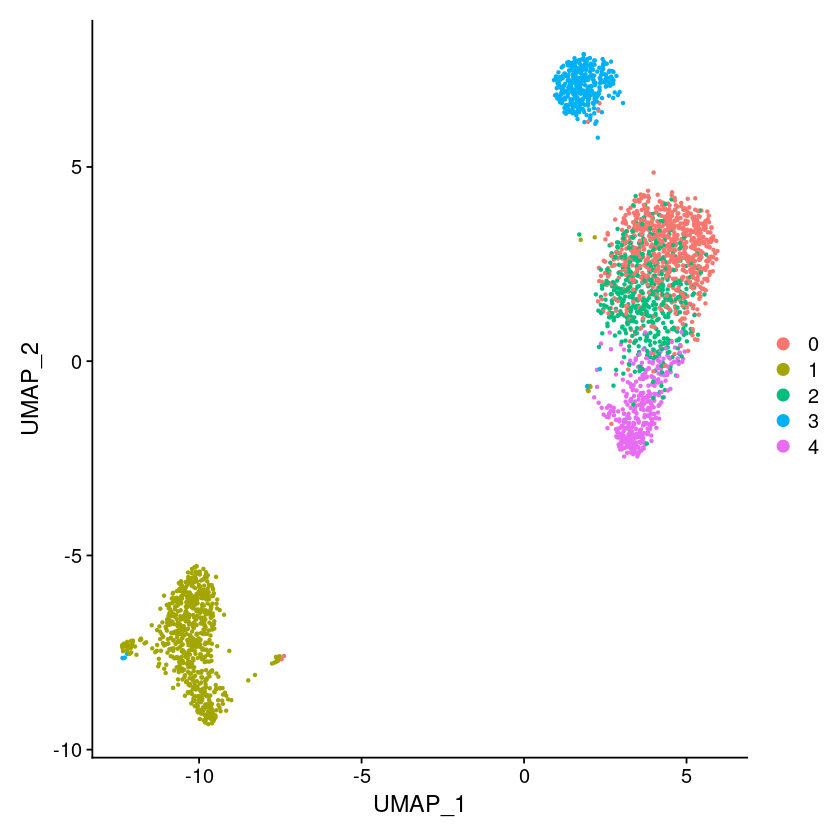

In [28]:
DimPlot(pbmc_distance, reduction = 'umap')

In [35]:
umap_reduction <- pbmc_distance@reductions$umap